In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('dataset_Facebook-Copy1.csv', delimiter = ';')

In [4]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


## Do people that get paid have more likes on average? 

In [5]:
df[df['Paid'] == 0]['like'].mean()

155.84679665738162

In [6]:
df[df['Paid'] == 1]['like'].mean()

235.6474820143885

- Null Hypothesis: Number of likes for paid posts <= number of likes for unpaid posts
- Alternative Hypothesis: Number of likes for paid > number of likes for unpaid posts

In [7]:
df.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [8]:
df.dropna(subset = ['Paid', "like"], axis = 0, inplace = True)

In [9]:
df.isnull().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.xkcd();

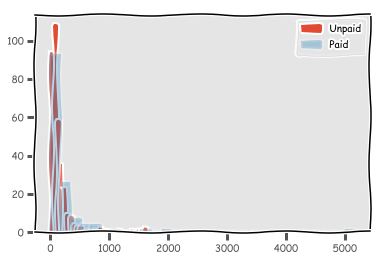

In [11]:
plt.hist(df[df['Paid'] == 0]['like'], label = 'Unpaid', alpha = 1, bins = 30)
plt.hist(df[df['Paid'] == 1]['like'], label = 'Paid', alpha = 0.2, bins = 30)
plt.legend();

In [12]:
mean_diff = df[df['Paid'] == 1]['like'].mean() - df[df['Paid'] == 0]['like'].mean()
mean_diff

79.80068535700687

In [13]:
df.shape

(498, 19)

In [19]:
df[df['Paid'] == 1].shape, df[df['Paid'] == 0].shape

((139, 19), (359, 19))

In [21]:
paid_sample = df.sample(replace = False, n = len(df[df['Paid'] == 1]))
paid_sample.shape

(139, 19)

In [23]:
unpaid_sample = df.drop(paid_sample.index, axis = 0)
unpaid_sample.shape

(359, 19)

In [17]:
%%time
mean_diff = df[df['Paid'] == 1]['like'].mean() - df[df['Paid'] == 0]['like'].mean()
sample_diffs = []
counter = 0

for x in range(10000):
    paid_sample = df.sample(replace = False, n = len(df[df['Paid'] == 1]))
    unpaid_sample = df.drop(paid_sample.index, axis = 0)
    sample_diff = paid_sample['like'].mean() - unpaid_sample['like'].mean()
    sample_diffs.append(sample_diff)
    if sample_diff > mean_diff:
        counter += 1

CPU times: user 20.5 s, sys: 201 ms, total: 20.7 s
Wall time: 20.9 s


In [15]:
import numpy as np

Text(0.5,1,'p value: 0.01')

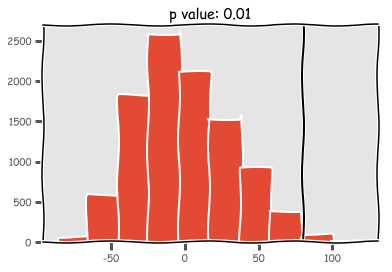

In [18]:
plt.hist(sample_diffs)
plt.axvline(mean_diff, color = 'k')
plt.title(f'p value: {np.round(counter / 10000, 2)}')

In [23]:
from scipy.stats import ttest_ind

In [24]:
ttest_ind(df[df['Paid'] == 1]['like'], df[df['Paid'] == 0]['like'])

Ttest_indResult(statistic=2.480522595537424, pvalue=0.013449631384145896)